Quick Exploratory Data Analysis for Module3's assignment

In [64]:
!poetry add seaborn

The currently activated Python version 3.10.12 is not supported by the project (^3.11).
Trying to find and use a compatible version. 
Using python3 (3.11.0)
The following packages are already present in the pyproject.toml and will be skipped:

  • seaborn

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [1]:
%reset -f

In [71]:
import csv
import os
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import random 
#  import seaborn as sns   ----> I don't have my environment properly configured

In [3]:
cwd = os.getcwd()
r_path = '/../../Data/'
file = 'feature_frame.csv'
path = cwd + r_path + file
df_orders = pd.read_csv(path)

In [77]:
pd.set_option('display.max_columns', None)
random.seed(0)
display(df_orders.sample(5).head())
df_orders.info()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,discount_pct,vendor,global_popularity,count_adults,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
1253385,33973247967364,cereal,2813292609668,3479364042884,2020-10-09 11:18:14,2020-10-09 00:00:00,3,0.0,0.0,0.0,0.0,0.0,0.081052,0.070234,kelloggs,0.025157,2.0,0.0,0.0,0.0,2.0,33.0,30.5,33.486116,30.0,29.0,26.476340
745567,34276571250820,tinspackagedfoods,2917509759108,3895886348420,2021-02-08 22:26:21,2021-02-08 00:00:00,3,0.0,0.0,0.0,0.0,0.0,0.121713,0.066815,biona,0.010269,2.0,0.0,0.0,0.0,2.0,33.0,28.0,21.694590,30.0,27.0,23.827826
1398230,34284955304068,bathshowergel,3642553270404,3914233184388,2021-03-02 15:01:44,2021-03-02 00:00:00,2,0.0,0.0,0.0,0.0,0.0,0.067498,0.204819,originalsource,0.006098,2.0,0.0,0.0,0.0,2.0,33.0,53.0,33.158990,30.0,37.0,30.506129
441397,34221708574852,floorcleanerpolish,2884408737924,3291707965572,2020-12-29 12:26:57,2020-12-29 00:00:00,11,0.0,0.0,0.0,0.0,0.0,0.105449,0.028278,method,0.019139,2.0,2.0,0.0,1.0,4.0,33.0,45.5,29.265216,30.0,38.5,31.832738
2767562,33826456273028,babyfood6months,2900256817284,3884114804868,2021-01-18 15:25:09,2021-01-18 00:00:00,2,0.0,0.0,0.0,0.0,0.0,0.053944,0.201005,organix,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,20.0,1.414214,30.0,30.0,18.973072


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

Here we can see the data frame columns

In [5]:
df_id = df_orders['variant_id'].astype(str)+' '+df_orders['order_id'].astype(str)
len(df_id[df_id.duplicated()])

0

As the description of the data set indicates, this two values are the id of the data set

In [6]:
product_type_counts = df_orders['product_type'].value_counts()
product_type_counts = pd.DataFrame({'Value': product_type_counts.index, 
                                    'Frequency': product_type_counts.values})

display(product_type_counts.reset_index(drop=True).transpose()) # I would like to drop the index in the print

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
Value,tinspackagedfoods,condimentsdressings,ricepastapulses,haircare,cookingingredientsoils,longlifemilksubstitutes,dishwasherdetergent,cereal,bathroomlimescalecleaner,kidssnacks,snacksconfectionery,jamhoneyspreads,dental,bathshowergel,coffee,handsoapsanitisers,pickledfoodolives,homebaking,babytoiletries,nappies,femininecare,tea,allpurposecleaner,washingliquidgel,cleaningaccessories,catfood,facialskincare,softdrinksmixers,dogfood,driedfruitsnutsseeds,shavinggrooming,babyfood6months,nappypants,fabricconditionerfreshener,kitchenovencleaner,juicesquash,kitchenrolltissues,bodyskincare,wipescottonwool,cookingsaucesmarinades,superfoodssupplements,foodstorage,deodorant,healthcarevitamins,floorcleanerpolish,delicatesstainremover,binbags,washingpowder,kidsdental,windowglasscleaner,dryingironing,airfreshener,toiletroll,beer,maternity,washingcapsules,babymilkformula,babyfood12months,householdsundries,petcare,feedingweaning,premixedcocktails
Frequency,226474,129749,128098,114978,110686,110235,98144,90898,82632,72554,66445,64627,64319,58525,58068,57432,55497,54868,54442,54336,54015,51653,51266,50423,50220,49433,48831,46678,45381,44798,43457,42006,41319,41154,37866,34031,31593,31014,30937,28701,27025,25718,24082,20676,20585,19220,13784,13784,10952,10338,10338,10120,10004,9796,8495,7527,7305,6797,6735,4075,2790,2620


In [7]:
user_counts = df_orders['user_id'].value_counts()
user_counts = pd.DataFrame({'Value': user_counts.index, 
                                    'Frequency': user_counts.values})

display(user_counts.reset_index(drop=True).transpose()) # I would like to drop the index in the print

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [8]:
order_counts = df_orders['order_id'].value_counts()
order_counts = pd.DataFrame({'Value': order_counts.index, 
                                    'Frequency': order_counts.values})

# another way 
# df_orders.groupby('order_id')['order_id'].count()

display(order_counts.reset_index(drop=True).transpose()) # I would like to drop the index in the print

variant_counts = df_orders['variant_id'].value_counts()
variant_counts = pd.DataFrame({'Value': variant_counts.index, 
                                    'Frequency': variant_counts.values})

display(variant_counts.reset_index(drop=True).transpose()) # I would like to drop the index in the print

0              1              2              3     \
Value      3643247394948  3643241300100  3643179434116  3643240185988   
Frequency            976            976            976            976   

                    4              5              6              7     \
Value      3643217739908  3643226718340  3642900349060  3643294515332   
Frequency            976            976            976            976   

                    8              9              10             11    \
Value      3643274788996  3643254800516  3643283734660  3643189461124   
Frequency            976            976            976            976   

                    12             13             14             15    \
Value      3643142340740  3643135492228  3643229274244  3643301986436   
Frequency            976            976            976            976   

                    16             17             18             19    \
Value      3643160395908  3643199160452  3642856079492  3643252899972   
Frequency            976            976            976            976   

                    20             21             22             23    \
Value      3642919485572  3643109408900  3643112882308  3643128381572   
Frequency            976            976            976            976   

                    24             25             26             27    \
Value      3643130314884  3642581450884  3642659078276  3642448937092   
Frequency            976            975            975            975   

                    28             29             30             31    \
Value      3642453688452  3642121388164  3642127319172  3642157793412   
Frequency            975            975            975            975   

                    32             33             34             35    \
Value      3642337624196  3642494845060  3642379829380  3642381303940   
Frequency            975            975            975            975   

                    36             37             38             39    \
Value      3642402766980  3642416988292  3642454048900  3642455785604   
Frequency            975            975            975            975   

                    40             41             42             43    \
Value      3642491273348  3642553270404  3642553598084  3642578272388   
Frequency            975            975            975            975   

                    44             45             46             47    \
Value      3642586431620  3642593968260  3642706690180  3642507526276   
Frequency            975            975            975            975   

                    48             49             50             51    \
Value      3642517651588  3642531545220  3642549665924  3642422100100   
Frequency            975            975            975            975   

                    52             53             54             55    \
Value      3642105495684  3642108346500  3642760331396  3642790609028   
Frequency            975            975            975            975   

                    56             57             58             59    \
Value      3642801684612  3642802176132  3642424492164  3642344505476   
Frequency            975            975            975            975   

                    60             61             62             63    \
Value      3642496319620  3642357186692  3642370982020  3642375471236   
Frequency            975            975            975            975   

                    64             65             66             67    \
Value      3642708230276  3642752073860  3642069418116  3641986613380   
Frequency            975            975            974            974   

                    68             69             70             71    \
Value      3642064175236  3642005454980  3642026459268  3642029113476   
Frequency            974            974            974            974   

                    72             73             74        

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975
Value,33826439594116,33826472919172,33667299246212,33667304784004,33992554512516,33667302359172,33667206283396,33826416656516,33826415345796,34083934339204,34081588805764,33667270738052,33667270934660,3366

There are 976 different products. 
Some orders have 967 entries, but some others don't. 

I think that maybe the dataset contains info about old orders, and probably some products haven't arrived yet to the database by the time this orders were done.

[ 0.  0.  0. ... 53. 53. 78.]


Text(0.5, 1.0, 'Histogram of the size of the orders')

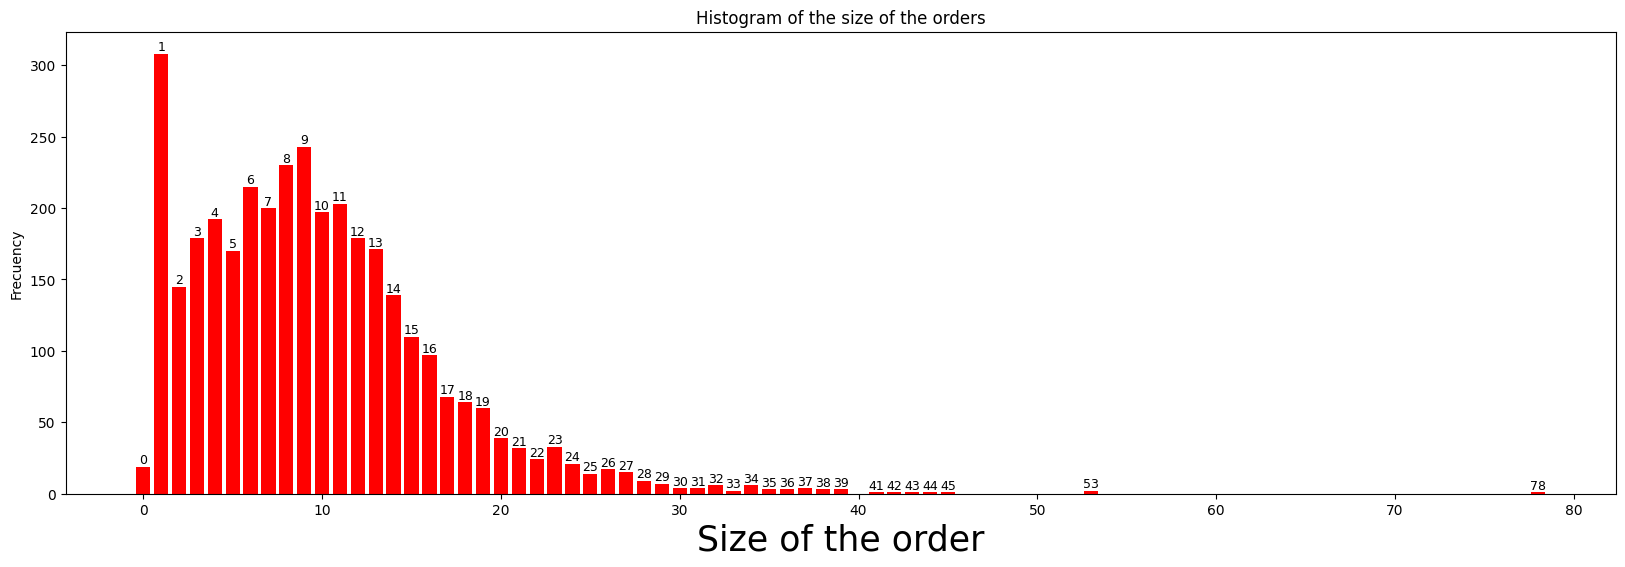

In [70]:
purchase_size = df_orders.groupby('order_id')['outcome'].sum().sort_values()
print(purchase_size.values)

purchase_size_unique, purchase_size_frec = np.unique(purchase_size, return_counts=True)

plt.figure(figsize=(20, 6))
plt.bar(purchase_size_unique, purchase_size_frec, color='red')

for i in range(len(purchase_size_frec)):
    plt.text(purchase_size_unique[i], purchase_size_frec[i], str(int(purchase_size_unique[i])), ha='center', va='bottom', fontsize = 9)


plt.xlabel('Size of the order', fontsize = 25)
plt.ylabel('Frequency')
plt.title('Histogram of the size of the orders')


TO DO: 

I don't know what the following columns mean:
- user_order_seq
- discount_pct
- days_since_purchase_variant_id
- avg_days_to_buy_variant_id
- std_days_to_buy_variant_id
- days_since_purchase_product_type
- avg_days_to_buy_product_type
- std_days_to_buy_product_type




